In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime

<class 'list'>


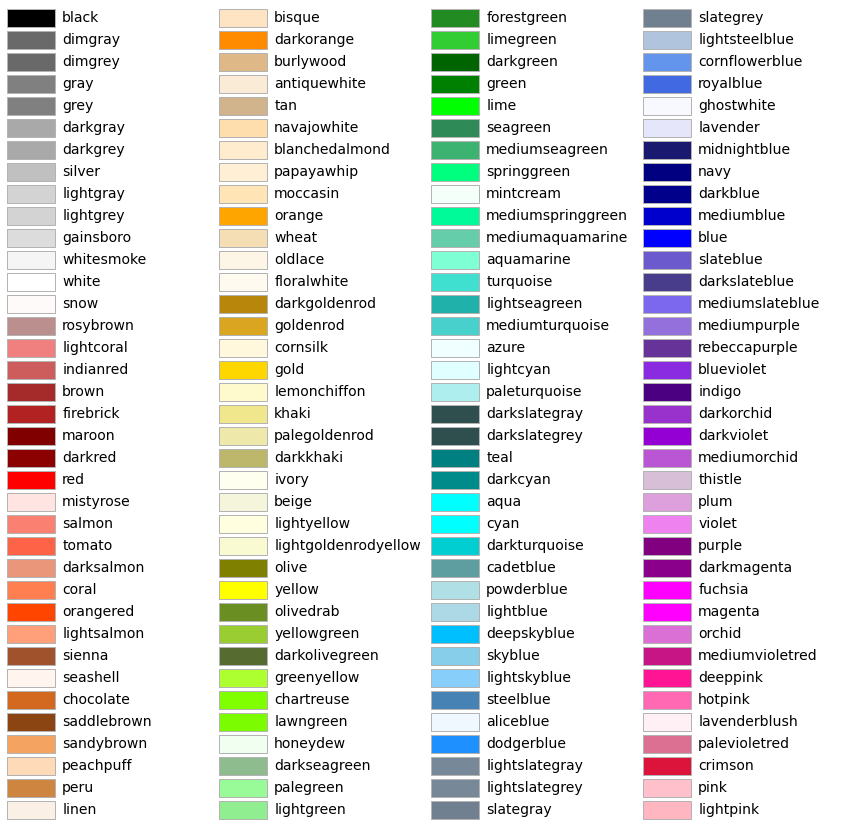

In [54]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):
    color_list = []
    print(type(color_list))
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')
        color_list.append(name)
        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return color_list

color_list = plot_colortable(mcolors.CSS4_COLORS)


## 1. 파일호출

In [ ]:
# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)


In [55]:
# 파일 불러오기
with open('../../data/df_body.pkl', 'rb') as f:
    df_body = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_user.pkl', 'rb') as f:
    df_user = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_answer_cnt.pkl', 'rb') as f:
    df_answer_cnt = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a.pkl', 'rb') as f:
    df_year_from_signup_a = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_qna.pkl', 'rb') as f:
    df_year_from_signup_qna = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_q.pkl', 'rb') as f:
    df_year_from_signup_q = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a.pkl', 'rb') as f:
    df_year_from_signup_a = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a_mm.pkl', 'rb') as f:
    df_year_from_signup_a_mm = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_q_mm.pkl', 'rb') as f:
    df_year_from_signup_q_mm = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_qna_mm.pkl', 'rb') as f:
    df_year_from_signup_qna_mm = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_year_gpt_yn.pkl', 'rb') as f:
    df_year_gpt_yn = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_usr_post_cre_avg_med.pkl', 'rb') as f:
    df_usr_post_cre_avg_med = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_diff_usrcre_avg_med.pkl', 'rb') as f:
    df_diff_usrcre_avg_med = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_no_post_per_year.pkl', 'rb') as f:
    df_no_post_per_year = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_year_from_signup_cnt.pkl', 'rb') as f:
    df_year_from_signup_cnt = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_active_usr_per_year.pkl', 'rb') as f:
    df_active_usr_per_year = pickle.load(f)


In [ ]:
# 파일 불러오기
with open('../../data/df_active_usr_per_day.pkl', 'rb') as f:
    df_active_usr_per_day = pickle.load(f)



In [ ]:
# df_usr_post_cre_cnt
with open('../../data/df_usr_post_cre_cnt.pkl', 'rb') as f:
    df_usr_post_cre_cnt = pickle.load(f)

In [ ]:
# df_vote_cnt_per_day df_vote_cnt_within_1month_per_day
with open('../../data/df_vote_cnt_per_day.pkl', 'rb') as f:
    df_vote_cnt_per_day = pickle.load(f)

In [ ]:
# df_vote_cnt_within_1month_per_day
with open('../../data/df_vote_cnt_within_1month_per_day.pkl', 'rb') as f:
    df_vote_cnt_within_1month_per_day = pickle.load(f)

In [ ]:
# df_vote_cnt_within_1month_per_day_qna
with open('../../data/df_vote_cnt_within_1month_per_day_qna.pkl', 'rb') as f:
    df_vote_cnt_within_1month_per_day_qna = pickle.load(f)

In [ ]:
# df_vote_cnt_within_1month_per_daytype_qna
with open('../../data/df_vote_cnt_within_1month_per_daytype_qna.pkl', 'rb') as f:
    df_vote_cnt_within_1month_per_daytype_qna = pickle.load(f)

In [ ]:
with open('../../data/df_usr_q_cre_avg_med.pkl', 'rb') as f:
    df_usr_q_cre_avg_med = pickle.load(f)

In [ ]:
with open('../../data/df_usr_a_cre_avg_med.pkl', 'rb') as f:
    df_usr_a_cre_avg_med = pickle.load(f)


In [57]:
with open('../../data/df_postcnt_per_tag_year.pkl', 'rb') as f:
    df_postcnt_per_tag_year = pickle.load(f)


In [ ]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

In [4]:
df_body['date'] = df_body['creationdate'].dt.date
df_body['year'] = df_body['creationdate'].dt.year
df_body['month'] = df_body['creationdate'].dt.month
df_body['day'] = df_body['creationdate'].dt.day

In [ ]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

## 2. POST

### Number of Questions and Answers over time

In [5]:
# Q&A 만 추출 
df_body = df_body[df_body['posttypeid'].isin(['1','2'])]

In [6]:
df_qna_num = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [12]:
df_qna_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7364 entries, 0 to 7363
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        7364 non-null   object
 1   posttypeid  7364 non-null   object
 2   id          7364 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 172.7+ KB


In [15]:
df_qna_num.date = pd.to_datetime(df_qna_num.date)

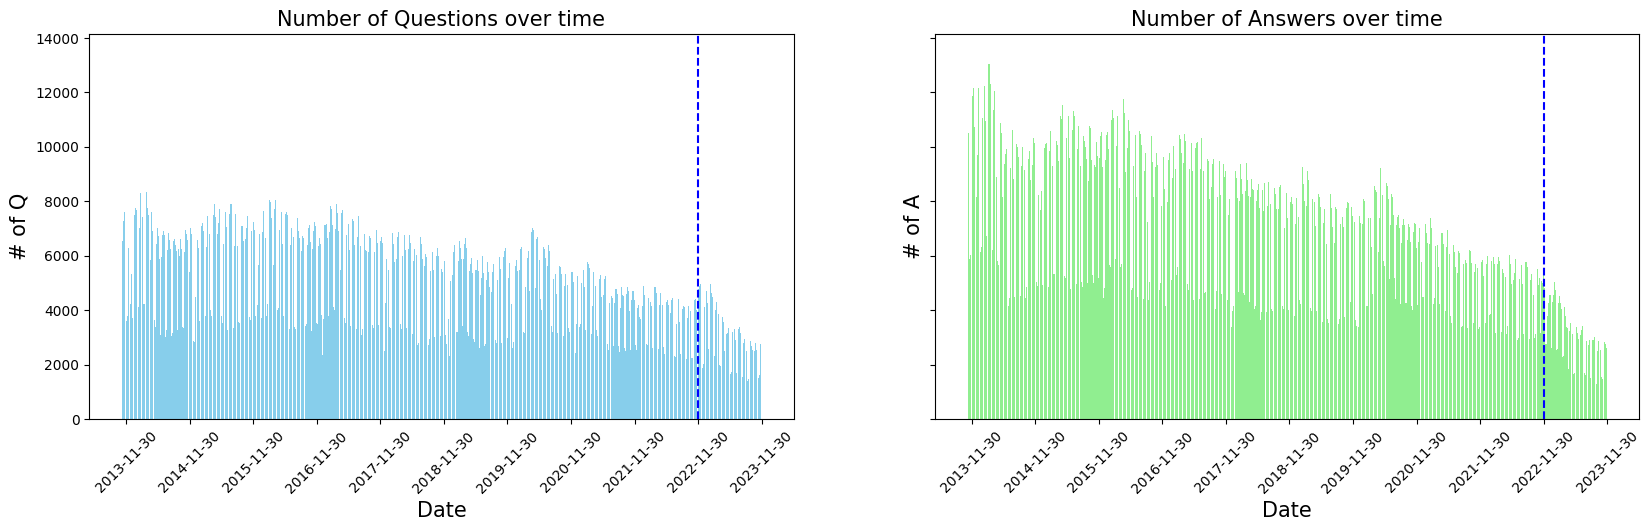

In [16]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(df_qna_num[df_qna_num['posttypeid'] =='1'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='1'].id
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_qna_num[df_qna_num['posttypeid'] =='2'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='2'].id
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [27]:
treat0 = df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2021-10-06')&(df_qna_num['date'] <= '2022-03-15')]
treat1 = df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2022-10-05')&(df_qna_num['date'] <= '2023-03-14')]

In [28]:
treat0.loc[:, 'rel_days'] = treat0.loc[:, 'date'] - datetime.datetime(2021,12,1)
treat1.loc[:, 'rel_days'] = treat1.loc[:, 'date'] - datetime.datetime(2022,11,30)

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_62068/1122784617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat0.loc[:, 'rel_days'] = treat0.loc[:, 'date'] - datetime.datetime(2021,12,1)
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_62068/1122784617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat1.loc[:, 'rel_days'] = treat1.loc[:, 'date'] - datetime.datetime(2022,11,30)


In [29]:
treat0['rel_week'] = np.floor(treat0['rel_days'].dt.days/7)
treat1['rel_week'] = np.floor(treat1['rel_days'].dt.days/7)

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_62068/2358586412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat0['rel_week'] = np.floor(treat0['rel_days'].dt.days/7)
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_62068/2358586412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat1['rel_week'] = np.floor(treat1['rel_days'].dt.days/7)


In [41]:
treat0_list = []
treat1_list = []


In [42]:
for x in treat0['rel_week'].unique():
    treat0_list.append(treat0.loc[treat0['rel_week']==x, 'date'].min())

In [44]:

for x in treat1['rel_week'].unique():
    treat1_list.append(treat1.loc[treat1['rel_week']==x, 'date'].min())

In [39]:
treat0_list

[Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-20 00:00:00'),
 Timestamp('2021-10-27 00:00:00'),
 Timestamp('2021-11-03 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-17 00:00:00'),
 Timestamp('2021-11-24 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2021-12-08 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2021-12-22 00:00:00'),
 Timestamp('2021-12-29 00:00:00'),
 Timestamp('2022-01-05 00:00:00'),
 Timestamp('2022-01-12 00:00:00'),
 Timestamp('2022-01-19 00:00:00'),
 Timestamp('2022-01-26 00:00:00'),
 Timestamp('2022-02-02 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-02-16 00:00:00'),
 Timestamp('2022-02-23 00:00:00'),
 Timestamp('2022-03-02 00:00:00'),
 Timestamp('2022-03-09 00:00:00')]

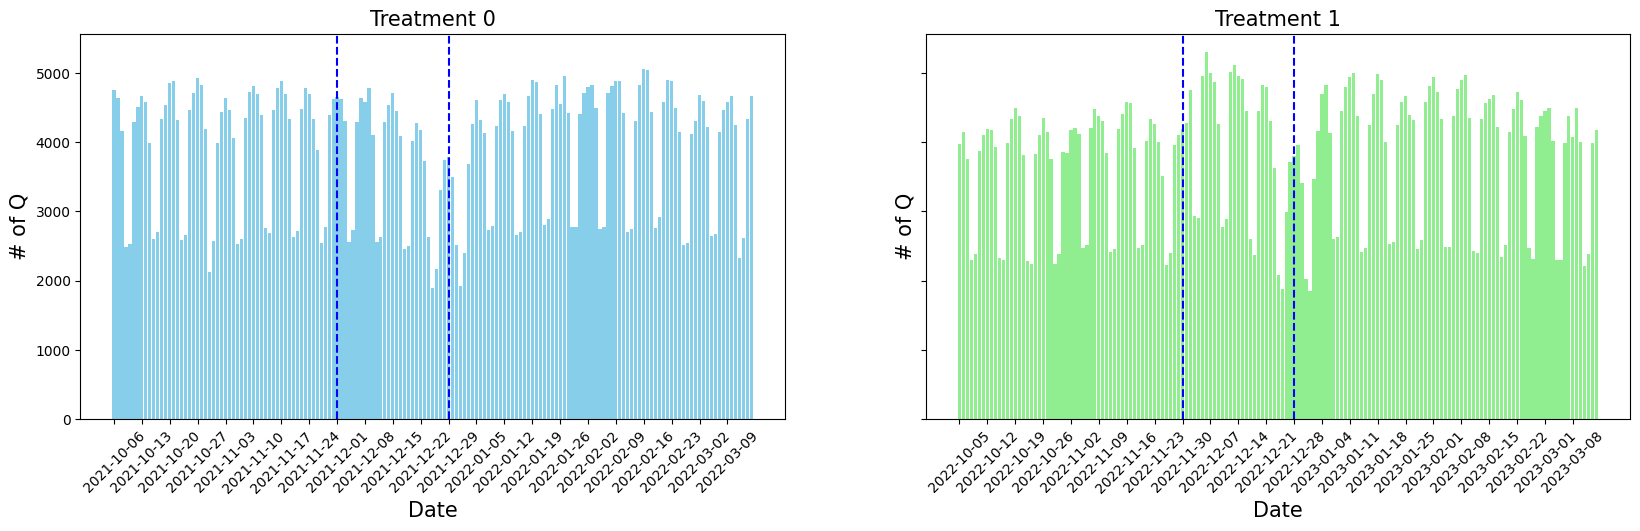

In [56]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=False)
# plt.xticks(rotation=45)
major_xticks = ['2021-10-06','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2021-10-06')&(df_qna_num['date'] <= '2022-03-15')].date
        ,  df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2021-10-06')&(df_qna_num['date'] <= '2022-03-15')].id
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Treatment 0', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
axs[0].set_xticks(treat0_list)
# axs[0].set_yticks(yticks)
axs[0].axvline([treat0_list[8]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

axs[0].axvline([treat0_list[12]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2022-10-05')&(df_qna_num['date'] <= '2023-03-14')].date
        ,  df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2022-10-05')&(df_qna_num['date'] <= '2023-03-14')].id
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Treatment 1', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of Q', fontsize = 15)
axs[1].set_xticks(treat1_list)
# axs[1].set_yticks(yticks)
axs[1].axvline([treat1_list[8]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

axs[1].axvline([treat1_list[12]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [20]:
df_qna_num[(df_qna_num['posttypeid'] =='1')&(df_qna_num['date'] >= '2022-10-05')&(df_qna_num['date'] <= '2022-03-14')].id

Series([], Name: id, dtype: int64)

In [ ]:
df_body.groupby(['posttypeid']).count()[['id']]

In [ ]:
df_body['body_len'] = df_body['body'].apply(lambda x : len(x))

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_bodycnt = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [ ]:
df_bodycnt = pd.pivot_table(df_bodycnt, index = 'date', columns = 'posttypeid', values = 'id').reset_index()

In [ ]:
df_bodycnt['q_over_a'] = df_bodycnt['2'].div(df_bodycnt['1'])

### Question over Answer

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_bodycnt.date
    ,  height = df_bodycnt['q_over_a']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer over Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



In [ ]:
df_bodyanswerdyn = df_body[df_body['posttypeid'] =='1'].groupby(['date', 'answered_yn']).count()[['id']].reset_index()

In [ ]:
df_bodyanswerdyn = pd.pivot_table(df_bodyanswerdyn, index = 'date', columns = 'answered_yn', values = 'id').reset_index()

In [ ]:
df_bodyanswerdyn['rate'] = df_bodyanswerdyn[1] / (df_bodyanswerdyn[1] + df_bodyanswerdyn[0])

### Ratio of Answered Question

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_bodyanswerdyn.date
    ,  height = df_bodyanswerdyn['rate']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Answer Count line plot

In [ ]:
df_answer_cnt

In [ ]:
df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count']

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2019'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'red',
        label = '2019.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'orange',
        label = '2020.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2021'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'green',
        label = '2021.11'
# label = ['question', 'answer']
) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2022'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'blue',
         label = '2022.11'
        # label = ['question', 'answer']
        ) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2023'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'purple', # bar color
        label = '2023.11'
        ) # create legened labels





ax.set_title('Answer Count line plot', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Minimun timedelta to get response per Date
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [ ]:
df_da['qna_diff'] = df_da['a_creationdate'] - df_da['q_creationdate']

In [ ]:
df_da_df = df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [ ]:
df_da_df['qna_diff_int'] = df_da_df['qna_diff']/ pd.Timedelta(minutes=1)

In [ ]:
df_da_df[['qna_diff', 'qna_diff_int', 'date']]

In [ ]:
df_da_df_dff        = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_df_dff_min    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_df_dff_max    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_df_dff_median = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [ ]:
df_da_df_dff.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff.date
    ,  height = df_da_df_dff['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff_median.date
    ,  height = df_da_df_dff_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Minimun timedelta to get response per Day in 1 month 
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [ ]:
df_da_in_month = df_da[df_da['qna_diff'].dt.days <=30]

In [ ]:
df_da_in_month_df = df_da_in_month.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [ ]:
df_da_in_month_df['qna_diff_int'] = df_da_in_month_df['qna_diff']/ pd.Timedelta(minutes=1)

In [ ]:
df_da_in_month_df        = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_in_month_df_min    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_in_month_df_max    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_in_month_df_median = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df.date
    ,  height = df_da_in_month_df['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df_median.date
    ,  height = df_da_in_month_df_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Distribution of Timedelta

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.hist(df_da_df_dff['qna_diff_int'], # specify data
        bins = 20, # number of bins

        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Answer Count', 'User Count']) # create legened labels

# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Distribution of Timedelta", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Timedelta", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# ax.axvline(['2022-11-30'], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)



# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.show();

### Length of Questions per Date

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_date_per_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()
df_date_per_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['body_len']).reset_index()
df_date_per_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len']).reset_index()
df_date_per_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['body_len']).reset_index()

In [ ]:
df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len'])

In [ ]:
df_date_per_len_q = df_date_per_len[df_date_per_len['posttypeid'] =='1']
df_date_per_len_q = df_date_per_len_q.set_index('date')
df_date_per_len_a = df_date_per_len[df_date_per_len['posttypeid'] =='2']
df_date_per_len_a = df_date_per_len_a.set_index('date')

In [ ]:
df_date_per_len_min_q = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='1']
df_date_per_len_min_q = df_date_per_len_min_q.set_index('date')
df_date_per_len_min_a = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='2']
df_date_per_len_min_a = df_date_per_len_min_a.set_index('date')

In [ ]:
df_date_per_len_max_q = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='1']
df_date_per_len_max_q = df_date_per_len_max_q.set_index('date')
df_date_per_len_max_a = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='2']
df_date_per_len_max_a = df_date_per_len_max_a.set_index('date')

In [ ]:
df_date_per_len_median_q = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='1']
df_date_per_len_median_q = df_date_per_len_median_q.set_index('date')
df_date_per_len_median_a = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='2']
df_date_per_len_median_a = df_date_per_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.bar(df_date_per_len_q.index
    ,  height = df_date_per_len_q['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_q.index
    ,  height = df_date_per_len_median_q['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type


# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
df_date_per_len_diff = (df_date_per_len_max_q['body_len'] - df_date_per_len_min_q['body_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_date_per_len_diff.index
    ,  height = df_date_per_len_diff['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Length of Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_a.index
    ,  height = df_date_per_len_a['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_a.index
    ,  height = df_date_per_len_median_a['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

### Answer Length over Question Length per Date

In [ ]:
df_date_per_len_rate = df_date_per_len_a['body_len'].div( df_date_per_len_q['body_len']).to_frame()

In [ ]:
df_date_per_len_rate.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_rate.index
    ,  height = df_date_per_len_rate['body_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer Length over Question Length per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A Len/Q Len", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();







### Length of SRC in Questions per Date

In [ ]:
def cleanhtml(raw_html):
  # 1.Source code in python language is hard to understand, so replace all the <code> tag first
  cleantext_1 = re.findall(r'(?<=\<code>)(.*?)(?=<\/code>)', raw_html.replace('\n', '_**_'))
  cleantext_1 = [x.replace('_**_', '\n') for x in cleantext_1]
  # 2. replace html tags
  # <p>
  tag_re = re.compile('<.*?>')
  cleantext_2 = [re.sub(tag_re, '', x) for x in cleantext_1]
  return cleantext_2

In [ ]:
# # apply the function, cleanhtml to the question and body text
# df_body.loc[:, 'prep_body'] = df_body['body'].apply(cleanhtml)
# 15분 걸림
# 전체 데이터셋 
# with open('../../data/df_body_prep.pkl', 'wb') as f:
#     pickle.dump(df_body, f)
# 파일 불러오기
with open('../../data/df_body_prep.pkl', 'rb') as f:
    df_body = pickle.load(f)

In [ ]:
df_body['concat_prep_body'] = df_body['prep_body'].apply(lambda x : ''.join(x))

In [ ]:
df_body['src_len'] = df_body['concat_prep_body'].apply(lambda x:len(x))

In [ ]:
len(df_body['id'].unique())
# 43352042

In [ ]:
df_date_per_src_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['src_len']).reset_index()
df_date_per_src_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['src_len']).reset_index()
df_date_per_src_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['src_len']).reset_index()
df_date_per_src_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['src_len']).reset_index()

In [ ]:
df_date_per_src_len_q = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='1']
df_date_per_src_len_q = df_date_per_src_len_q.set_index('date')
df_date_per_src_len_a = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='2']
df_date_per_src_len_a = df_date_per_src_len_a.set_index('date')

In [ ]:
df_date_per_src_len_median_q = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='1']
df_date_per_src_len_median_q = df_date_per_src_len_median_q.set_index('date')
df_date_per_src_len_median_a = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='2']
df_date_per_src_len_median_a = df_date_per_src_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_q.index
    ,  height = df_date_per_src_len_q['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_src_len_median_q.index
    ,  height = df_date_per_src_len_median_q['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of SRC in Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))


plt.xticks(rotation=45)
plt.show();

### Length  of SRC in Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_a.index
    ,  height = df_date_per_src_len_a['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_src_len_median_a.index
    ,  height = df_date_per_src_len_median_a['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length  of SRC in Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_src_len_rate = df_date_per_src_len_a['src_len'].div( df_date_per_src_len_q['src_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_rate.index
    ,  height = df_date_per_src_len_rate['src_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_q_a = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==1)]
df_q = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==0)]
# df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()

In [ ]:
# df_date_per_src_len = 
df_q_a_m = df_q_a.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_a_m_median = df_q_a.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

df_q_m = df_q.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_m_median = df_q.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

In [ ]:
df_q_m

In [ ]:
# df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])

### SRC length of Answered Questions

In [ ]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
yticks = np.arange(200, 2000, 400)
axs[0].bar(df_q_a_m['date']
        ,  df_q_a_m['src_len']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type


axs[0].bar(df_q_a_m_median['date']
        ,  df_q_a_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('SRC length of Answered Questions ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Length', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_q_m['date']
        ,  df_q_m['src_len']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].bar(df_q_m_median['date']
        ,  df_q_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('SRC length of not Answered Questions ', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Length', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [ ]:
# fig, ax = plt.subplots()

# ax.bar(df_date_per_src_len_rate.index
#     ,  height = df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])
#     ,  color = 'skyblue'
#     # ,  edgecolor = 'black'
#       ) # hist type

# ax.set_title("Question and Answer Count per Date", # add title
#              fontsize = 12.5,
#              weight = 'bold',
#              pad = 10,
#              loc = 'center')
# ax.set_xlabel("Date", # add x-axis label
#               fontsize = 12.5)
# ax.set_ylabel("Count", # add y-axis label
#               fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# # ax.axvline('2022-11-30', # add vertical line
# #            color = 'red',
# #            linestyle = '--',
# #            linewidth = 1.5)


# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

# plt.xticks(rotation=45)
# plt.show();

### Length of Title per Day

In [ ]:
df_body_q = df_body[df_body['posttypeid'] =='1']

In [ ]:
df_body_q['title_len'] = df_body_q['title'].apply(lambda x : len(x))

In [ ]:
df_date_per_t_len         = df_body_q.groupby(['date','year', 'month', 'day']).mean(['title_len']).reset_index()
df_date_per_len_t_min     = df_body_q.groupby(['date','year', 'month', 'day']).min(['title_len']).reset_index()
df_date_per_len_t_max     = df_body_q.groupby(['date','year', 'month', 'day']).max(['title_len']).reset_index()
df_date_per_len_t_median  = df_body_q.groupby(['date','year', 'month', 'day']).median(['title_len']).reset_index()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_t_len.date
    ,  height = df_date_per_t_len['title_len']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_len_t_median.date
    ,  height = df_date_per_len_t_median['title_len']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.set_title("Length of Title per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 3. Tag

### Number of Tag per Day

In [ ]:
df_da_q = df_da[['q_id', 'q_creationdate','q_tags']].drop_duplicates()

In [ ]:
df_da_q['year'] = df_da_q['q_creationdate'].dt.year
df_da_q['month'] = df_da_q['q_creationdate'].dt.month
df_da_q['day'] = df_da_q['q_creationdate'].dt.day
df_da_q['date'] = df_da_q['q_creationdate'].dt.date

In [ ]:
df_da_q['q_tags_list'] = df_da_q['q_tags'].apply(lambda x : x.strip().split(' '))

In [ ]:
print(df_da_q[['q_id']].shape)
print(df_da_q[['q_id']].drop_duplicates().shape)

In [ ]:
df_da_q = df_da_q.reset_index(drop=True)

In [ ]:
df_da_q_ex = df_da_q[['q_id', 'q_tags_list']].apply(pd.Series.explode)

In [ ]:
df_da_q_ex['q_tags_list'].value_counts().head(20)

In [ ]:
df_da_q_ex

In [ ]:
df_da_q['q_tagslen'] = df_da_q['q_tags'].apply(lambda x : len(x.strip().split(' ')))

In [ ]:
df_da_q_year = pd.merge(df_da_q[['q_id', 'year']], df_da_q_ex, on = 'q_id')

In [ ]:
df_da_q_year = df_da_q_year.groupby(['year','q_tags_list']).count()['q_id'].reset_index()
#  df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1) > 확인필요 

In [ ]:
df_da_q_year = df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)

In [ ]:
df_da_q_year

In [ ]:
### create a figure with multiple subplots


sharey = False ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 5, figsize = (20, 10), sharey=sharey, sharex=sharex)

for x in range(0, 2):
    for y in range(0,5):
        standard_year = 2014
        loop_year = standard_year + (x*5 + y*1)
        axs[x][y].bar( df_da_q_year[df_da_q_year['year'] ==loop_year].q_tags_list
                    ,  df_da_q_year[df_da_q_year['year'] ==loop_year].q_id
                    ,  color = 'skyblue'
                ) # hist type
        axs[x][y].set_title(str(loop_year), # add title
             pad = 10,
             loc = 'center')
        axs[x][y].tick_params(axis='x', rotation=45)


 
plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [60]:
# df_postcnt_per_tag_year

df_postcnt_per_tag_year_melt = df_postcnt_per_tag_year.melt(id_vars = ['year'], value_vars=df_postcnt_per_tag_year.columns[1:])

In [72]:
# df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)
df_postcnt_top10 = df_postcnt_per_tag_year_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(10)

In [73]:
df_postcnt_top10

,year,variable,value
15,2023,python,106558.98333333333333329434
31,2023,javascript,54035.31666666666666660556
79,2023,c#,36836.08333333333333332782
47,2023,reactjs,35920.63333333333333330727
63,2023,java,35551.83333333333333331299
...,...,...,...
240,2008,php,1834.41666666666666666632
0,2008,python,1729.58333333333333333312
608,2008,sql_server,1617.86666666666666666634
160,2008,sql,1436.83333333333333333292


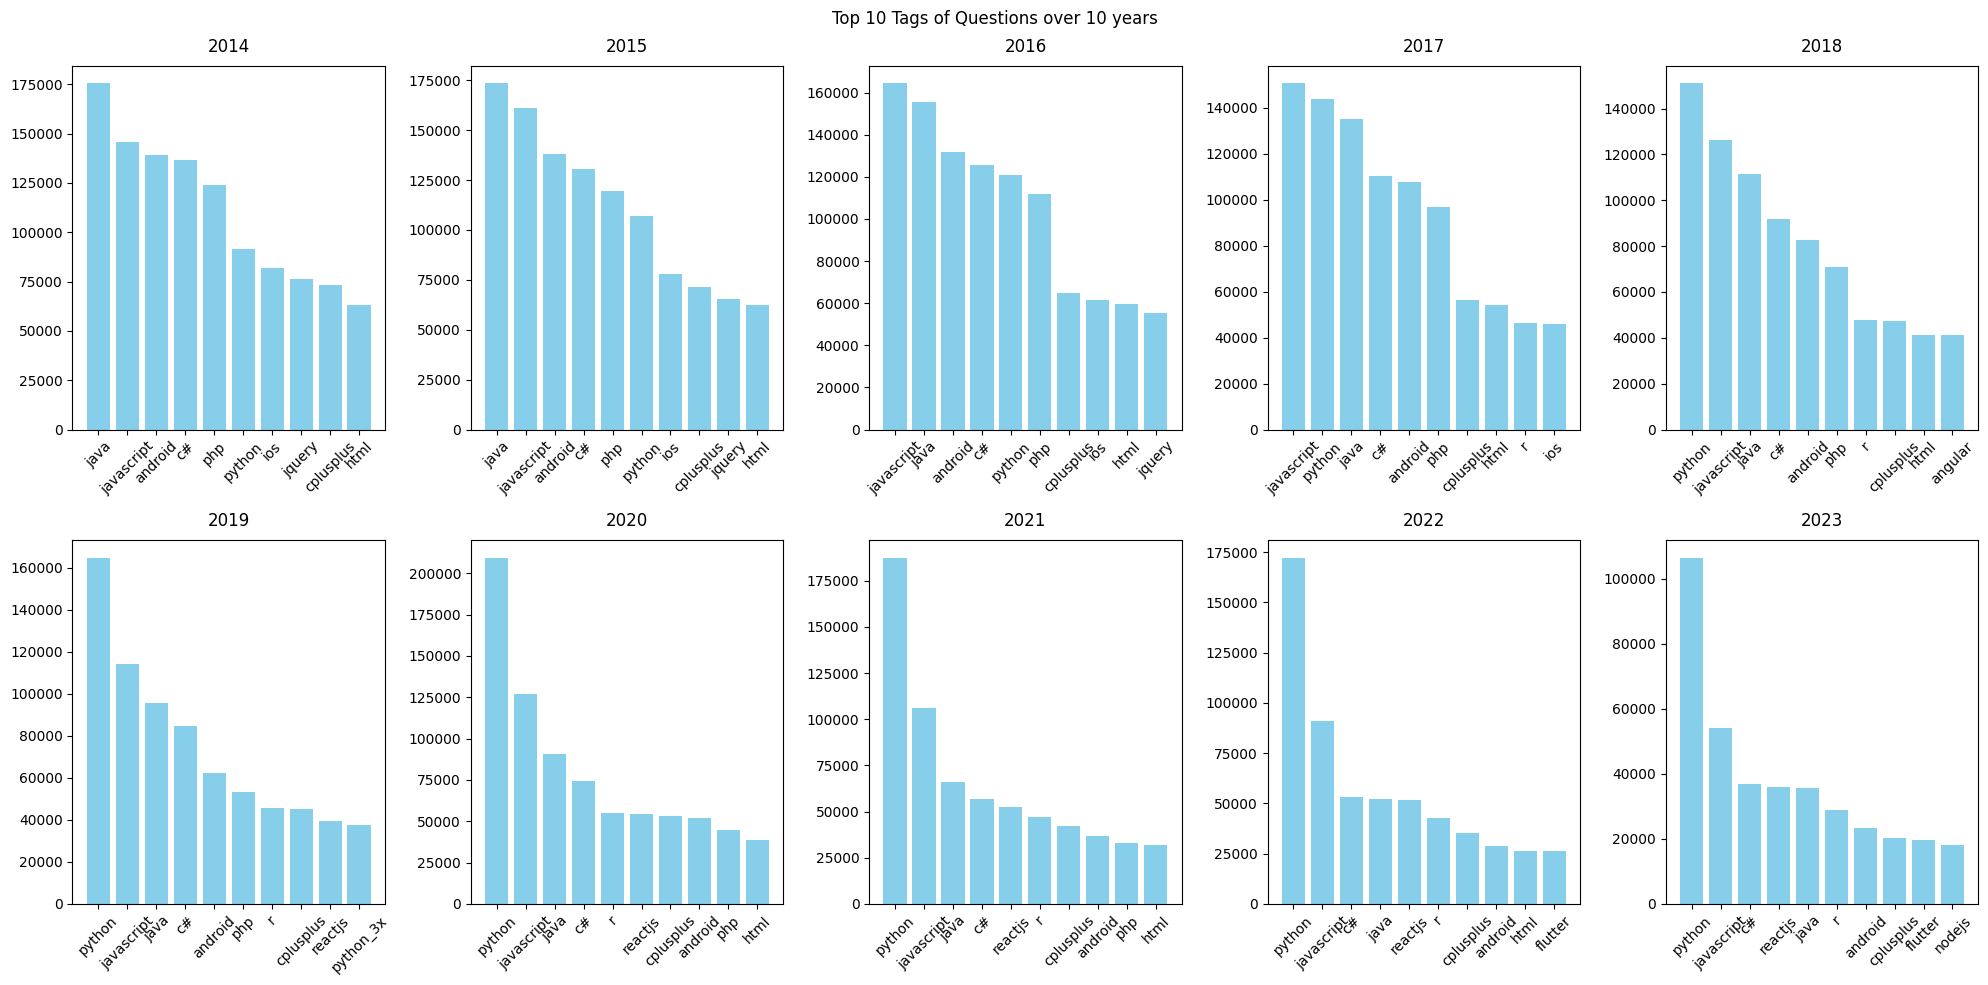

In [75]:
### create a figure with multiple subplots


sharey = False ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 5, figsize = (20, 10), sharey=sharey, sharex=sharex)

for x in range(0, 2):
    for y in range(0,5):
        standard_year = 2014
        loop_year = str(standard_year + (x*5 + y*1))
        axs[x][y].bar( df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].variable
                    ,  df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].value
                    ,  color = 'skyblue'
                ) # hist type
        axs[x][y].set_title(str(loop_year), # add title
             pad = 10,
             loc = 'center')
        axs[x][y].tick_params(axis='x', rotation=45)


 
plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [ ]:
df_da_q_per_len         = df_da_q.groupby(['date','year', 'month', 'day']).mean(['q_tagslen']).reset_index()
df_da_q_per_len_min     = df_da_q.groupby(['date','year', 'month', 'day']).min(['q_tagslen']).reset_index()
df_da_q_per_len_max     = df_da_q.groupby(['date','year', 'month', 'day']).max(['q_tagslen']).reset_index()
df_da_q_per_len_median  = df_da_q.groupby(['date','year', 'month', 'day']).median(['q_tagslen']).reset_index()


In [ ]:
df_da_q_year_top50 = pd.merge(df_da_q[['q_id', 'year']], df_da_q_ex, on = 'q_id')
df_da_q_year_top50 = df_da_q_year_top50.groupby(['year','q_tags_list']).count()['q_id'].reset_index()
df_da_q_year_top50 = df_da_q_year_top50.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(50)


In [ ]:
df_da_q_year_top50

In [ ]:
df_da_q_year_top50 = df_da_q_year_top50[df_da_q_year_top50['year'].isin([2022, 2023])].sort_values(by = ['q_id'], ascending=False)

In [ ]:
tags_dict = {}
def get_top_50(row):
    tag_nm = row[1]
    if tag_nm in tags_dict : 
        print("key exists!")
    else :
        print("new key!", tag_nm)
        tags_dict[tag_nm] = row[2]

In [ ]:
df_da_q_year_top50.apply(get_top_50, axis = 1)

In [ ]:
tags_dict

In [ ]:
# 전체 데이터셋 
with open('../../data/top50_tags_in_2022_2023.pkl', 'wb') as f:
    pickle.dump(tags_dict, f)

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_q_per_len_median.date
    ,  height = df_da_q_per_len_median['q_tagslen']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_da_q_per_len.date
    ,  height = df_da_q_per_len['q_tagslen']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type



ax.set_title("Number of tag per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_da_q_per_len_median

### 4. User

In [ ]:
df_user['year'] = df_user['creationdate'].dt.year
df_user['month'] = df_user['creationdate'].dt.month
df_user['day'] = df_user['creationdate'].dt.day
df_user['date'] = df_user['creationdate'].dt.date


In [ ]:
df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date         = df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_user_per_date.date
    ,  height = df_user_per_date['id']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Sign up Users per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 4. User

In [ ]:
df_user

In [ ]:
df_user['date']   = df_user['creationdate'].dt.date

In [ ]:
df_da_q = df_da[['q_id', 'q_owneruserid']].drop_duplicates()
df_da_a = df_da[['a_id', 'a_owneruserid']].drop_duplicates()

In [ ]:
df_da_q_cnt = df_da_q.groupby(['q_owneruserid']).count()[['q_id']]
df_da_a_cnt = df_da_a.groupby(['a_owneruserid']).count()[['a_id']]

In [ ]:
df_user_qna = pd.merge(df_user, df_da_q_cnt, left_on = 'id', right_on = 'q_owneruserid', how= 'left')
df_user_qna = pd.merge(df_user_qna, df_da_a_cnt, left_on = 'id', right_on = 'a_owneruserid', how= 'left')

In [ ]:
df_user_qna.fillna(0, inplace=True)

In [ ]:
df_user_qna

### Question and Answer

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_user_qna['q_id'], df_user_qna['a_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_user_qna

In [ ]:
df_user_qna['gpt_af_yn'] = np.where(df_user_qna['date'] >= datetime.date(2022,11,30), 1, 0)

In [ ]:
df_user_qna

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_user_qna_bf = df_user_qna[(df_user_qna['creationdate'] >= '2021-11-30') &(df_user_qna['creationdate'] < '2022-11-30') ]

In [ ]:
df_user_qna_af = df_user_qna[(df_user_qna['creationdate'] >= '2022-11-30') &(df_user_qna['creationdate'] < '2023-11-30') ]

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna_bf, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer-bf')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')
ax.set_yscale('log')
ax.set_xscale('log')

plt.show();



In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna_af, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer-af')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')
ax.set_yscale('log')
ax.set_xscale('log')

plt.show();



In [ ]:
df_user_qna_bf

In [ ]:
fig_scatter_reg, axes = plt.subplots(ncols=2, figsize = (20, 10))
sns.scatterplot(data = df_user_qna_bf, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6
                , ax = axes[0])

sns.scatterplot(data = df_user_qna_af, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6
                , ax = axes[1])


axes[0].set_title('Question and Answer-bf')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Answer')
axes[0].set_yscale('log')
axes[0].set_xscale('log')


axes[1].set_title('Question and Answer-af')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('Answer')
axes[1].set_yscale('log')
axes[1].set_xscale('log')

plt.show();



무언가 이상한걸 감지함... 
가입 이후  포스트를 작성한 기간이 동일 하지 않음 이슈... 
맞추고 가보자 300일로 

In [ ]:
df_usr_bf = df_user[(df_user['creationdate']>='2021-12-01') & (df_user['creationdate']<='2021-12-31') ]
df_usr_af = df_user[(df_user['creationdate']>='2022-12-01') & (df_user['creationdate']<='2022-12-31') ]

In [ ]:
df_body = df_body[['id', 'creationdate', 'posttypeid', 'owneruserid']]


In [ ]:
df_body = df_body[df_body['posttypeid'].isin(['1', '2'])]

In [ ]:
df_body.columns = ['p_id', 'p_creationdate', 'posttypeid', 'p_owneruserid']

In [ ]:
df_usr_bf_post = pd.merge(df_usr_bf, df_body, left_on = 'id', right_on = 'p_owneruserid', how='left')
df_usr_af_post = pd.merge(df_usr_af, df_body, left_on = 'id', right_on = 'p_owneruserid', how='left')

In [ ]:
df_usr_bf_post['diff_days'] = df_usr_bf_post['p_creationdate'] - df_usr_bf_post['creationdate']
df_usr_af_post['diff_days'] = df_usr_af_post['p_creationdate'] - df_usr_af_post['creationdate']

In [ ]:
df_usr_bf_post = df_usr_bf_post[df_usr_bf_post['diff_days'].dt.days <300]
df_usr_af_post = df_usr_af_post[df_usr_af_post['diff_days'].dt.days <300]

In [ ]:
df_usr_bf_post = df_usr_bf_post.groupby(['id', 'posttypeid']).count()['p_id'].reset_index()
df_usr_af_post = df_usr_af_post.groupby(['id', 'posttypeid']).count()['p_id'].reset_index()

In [ ]:
df_usr_bf_post = df_usr_bf_post.pivot_table(index = 'id', columns =  'posttypeid', values = 'p_id').reset_index()
df_usr_af_post = df_usr_af_post.pivot_table(index = 'id', columns =  'posttypeid', values = 'p_id').reset_index()

In [ ]:
df_usr_bf_post = df_usr_bf_post.fillna(0)
df_usr_af_post = df_usr_af_post.fillna(0)

In [ ]:
df_usr_bf_post

In [ ]:
fig_scatter_reg, axes = plt.subplots(ncols=2, figsize = (20, 10))
sns.scatterplot(data = df_usr_bf_post, x = '1', y = '2', color = 'purple', alpha = 0.6
                , ax = axes[0])

sns.scatterplot(data = df_usr_af_post, x = '1', y = '2', color = 'purple', alpha = 0.6
                , ax = axes[1])


axes[0].set_title('Question and Answer after sign up within 300 days-bf')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Answer')
axes[0].set_yscale('log')
axes[0].set_xscale('log')


axes[1].set_title('Question and Answer after sign up within 300 days-af')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('Answer')
axes[1].set_yscale('log')
axes[1].set_xscale('log')

plt.show();



아니 혼자 7만건은 좀 너무한거 아닙니까...ㅎㅎㅎㅎㅎ

In [ ]:
df_q_1144035 = df_da.loc[df_da['a_owneruserid'] == 1144035, ['q_id', 'a_creationdate']]

In [ ]:
df_q_1144035 = df_q_1144035[['q_id', 'a_creationdate']].drop_duplicates()

In [ ]:
df_q_1144035['date'] = df_q_1144035['a_creationdate'].dt.date

In [ ]:
df_q_1144035

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_q_1144035['date'], df_q_1144035['q_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_q_1144035['date'].max()

In [ ]:
df_q_1144035.groupby('date').count()[['q_id']].sort_values(by = ['date'])

### Number of Posts after n years from signup

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, :].yeardiff.values ,
        df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, 'cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, :].yeardiff.values ,
        df_year_from_signup_a.loc[df_year_from_signup_a['yeardiff']>=0, 'cnt'].values, # specify data
        color = 'green',
        label = 'Answer'
) 

ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, :].yeardiff.values ,
        df_year_from_signup_q.loc[df_year_from_signup_q['yeardiff']>=0, 'cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question'
) 

# 

ax.set_title('Number of Posts after n years from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>0, :].yeardiff.values

In [ ]:
df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values
# ['mean_cnt']

### Average Number of Posts after n year from sign up

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 

        
ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Answer'
) 

ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question'
) 

# 

ax.set_title('Average Number of Posts after n year from sign up', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Number of Unique Users per Post after n years from signup

In [ ]:
df_year_from_signup_cnt = df_year_from_signup_cnt[df_year_from_signup_cnt['yeardiff'] >=0]

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['tot_usr_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['a_usr_cnt'].values, # specify data
        color = 'green',
        label = 'Answer'
)


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['q_usr_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question'
) 



ax.set_title(' Number of Unique Users per Post after n years from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('# of Unique Users', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
fig, ax = plt.subplots()


df_year_from_signup_cnt_over8 = df_year_from_signup_cnt[df_year_from_signup_cnt['yeardiff']>=8]
ax.plot(df_year_from_signup_cnt_over8.yeardiff.values, 
        df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['tot_usr_cnt'].values, # specify data
        color = 'red',
        label = 'Post'
) 


ax.plot(df_year_from_signup_cnt_over8.yeardiff.values,
        df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['q_usr_cnt'].values, # specify data
        color = 'green',
        label = 'Questions'
) 

ax.plot(df_year_from_signup_cnt_over8.yeardiff.values,
        df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['a_usr_cnt'].values, # specify data
        color = 'blue',
        label = 'Answers'
) 



ax.set_title('Number of Unique Users per Post after n years from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('# of Unique Users', fontsize = 12.5) # y-axis label
ax.set_xticks(np.arange(8, 17))

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Median Number of Posts after year from signup

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'green',
        label = 'Answer only'
) 

# ax.plot(df_year_from_signup_a_mm['med_cnt'].values, # specify data
#         color = 'lightgreen',
#         label = 'Question only'
# ) 

# 

ax.set_title('Median Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Posts after year from signup

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 




ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
)




ax.set_title('Comparing Median/Average Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Questions after year from signup

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Questions after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Answers after year from signup

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_year_gpt_yn = df_year_gpt_yn[df_year_gpt_yn['yeardiff']>=0]

In [ ]:
df_year_gpt_yn

In [ ]:
c_gpt_n = df_year_gpt_yn['c_gpt_yn'] ==0
c_gpt_y = df_year_gpt_yn['c_gpt_yn'] ==1 

u_c_gpt_n = df_year_gpt_yn['u_c_gpt_yn'] ==0
u_c_gpt_y = df_year_gpt_yn['u_c_gpt_yn'] ==1 

In [ ]:
df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_n, 'q_cnt'].values


In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_n, 'q_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_y, 'q_cnt'].values, # specify data
        color = 'orange',
        label = 'Median'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_n, 'q_cnt'].values, # specify data
        color = 'pink',
        label = 'Median'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_y, 'q_cnt'].values, # specify data
        color = 'lightblue',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_usr_post_cre_avg_med.sort_values(by  = ['usr_creationyear', 'post_creationyear'])

In [ ]:
df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear'] =='2010']

In [ ]:
df_diff_usrcre_avg_med = df_diff_usrcre_avg_med.sort_values(by = ['usr_creationyear', 'yeardiff'])

In [ ]:
df_diff_usrcre_avg_med.head()

### Comparing Average Number of Posts per Cohort after year from signup

In [ ]:
year_list = [str(x) for x in np.arange(2008, 2008+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Average Number of Posts per Cohort after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();
# 08년 집단이 왜이렇게 강력한가 
# 2008년부터 2014년까지의 코호트는 모두 비슷하게 1 2년차에 가장 활동을 활발하게 하고 갈수록 떨어진다

In [ ]:
year_list = [str(x) for x in np.arange(2014, 2014+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_diff_usrcre_avg_med

In [ ]:
year_list = [str(x) for x in np.arange(2017, 2017+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
std_year = 2013
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].head(len(year_list[i:])).avg_post_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
std_year = 2016
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].head(len(year_list[i:])).avg_post_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Average number of posts by cohort

In [ ]:
df_usr_post_cre_avg_med = df_usr_post_cre_avg_med.sort_values(by = ['usr_creationyear', 'post_creationyear'])

In [ ]:
df_usr_post_cre_avg_med

In [ ]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_post_cre_avg_med.loc[df_usr_post_cre_avg_med['usr_creationyear'] == year_list[idx], 'post_creationyear']
      ,  df_usr_post_cre_avg_med.loc[df_usr_post_cre_avg_med['usr_creationyear'] == year_list[idx], 'avg_post_cnt']
      ,  color=color_list[20+(idx*6)]
      , label = year_list[idx]
        ) # hist type


ax.set_title('Average number of posts by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('number of posts', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [ ]:
# df_usr_post_cre_cnt_pivot.sort_values(by = ['usr_creationyear', 'postcreationyear'])
df_usr_a_cre_avg_med = df_usr_a_cre_avg_med.sort_values(by = ['usr_creationyear', 'a_creationyear'])
df_usr_q_cre_avg_med = df_usr_q_cre_avg_med.sort_values(by = ['usr_creationyear', 'q_creationyear'])

In [ ]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_a_cre_avg_med.loc[df_usr_a_cre_avg_med['usr_creationyear'] == year_list[idx], 'a_creationyear']
       ,  df_usr_a_cre_avg_med.loc[df_usr_a_cre_avg_med['usr_creationyear'] == year_list[idx], 'avg_post_cnt']
       ,  color=color_list[20+(idx*6)]
      , label = year_list[idx]
        ) # hist type


ax.set_title('Average number of Answers by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('number of posts', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [ ]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_q_cre_avg_med.loc[df_usr_q_cre_avg_med['usr_creationyear'] == year_list[idx], 'q_creationyear']
       ,  df_usr_q_cre_avg_med.loc[df_usr_q_cre_avg_med['usr_creationyear'] == year_list[idx], 'avg_post_cnt']
       ,  color=color_list[20+(idx*6)]
      , label = year_list[idx]
        ) # hist type


ax.set_title('Average number of Questions by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('number of posts', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [ ]:
df_no_post_per_year['post_n_usr_cnt'] = df_no_post_per_year['usr_cnt'] - df_no_post_per_year['post_y_usr_cnt'] 

In [ ]:
df_no_post_per_year = df_no_post_per_year.sort_values(by = ['usr_creationyear', 'postcreationyear'])

In [ ]:
df_no_post_per_year

In [ ]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_usr_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_no_post_per_year['post_n_rate'] = df_no_post_per_year['post_n_usr_cnt']/df_no_post_per_year['usr_cnt']*100

In [ ]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_rate.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
std_year = 2020
num_of_year = 4
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_rate.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_usr_post_cre_avg_med = df_usr_post_cre_avg_med.sort_values(by = ['usr_creationyear', 'post_creationyear'])

In [ ]:
df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].post_creationyear.values

### Number of answer over question by cohort

In [ ]:
df_usr_post_cre_cnt

In [ ]:
df_usr_post_cre_cnt_pivot = df_usr_post_cre_cnt.pivot(index=['usr_creationyear', 'postcreationyear'], columns = 'posttypeid', values = 'post_cnt').reset_index()

In [ ]:
# df_usr_post_cre_cnt_pivot
df_usr_post_cre_cnt_pivot['a_over_q'] = df_usr_post_cre_cnt_pivot['2']/df_usr_post_cre_cnt_pivot['1']

In [ ]:
df_usr_post_cre_cnt_pivot.sort_values(by = ['usr_creationyear', 'postcreationyear'])

In [ ]:
df_usr_post_cre_cnt_pivot.loc[df_usr_post_cre_cnt_pivot['usr_creationyear'] == '2008', 'a_over_q']

In [ ]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_post_cre_cnt_pivot.loc[df_usr_post_cre_cnt_pivot['usr_creationyear'] == year_list[idx], 'postcreationyear']
      ,  df_usr_post_cre_cnt_pivot.loc[df_usr_post_cre_cnt_pivot['usr_creationyear'] == year_list[idx], 'a_over_q']
      ,  color=color_list[20+(idx*5)]
      , label = year_list[idx]
        ) # hist type


# major_xticks = ['2022']

ax.set_title('Number of answer over question by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('A/Q', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [ ]:
df_no_post_per_year['post_n_pct_chg'] = df_no_post_per_year.groupby('usr_creationyear').post_n_usr_cnt.pct_change()

In [ ]:
df_no_post_per_year= df_no_post_per_year.fillna(0)

In [ ]:
df_no_post_per_year

In [ ]:
std_year = 2020
num_of_year = 4
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_no_post_per_year[df_no_post_per_year['usr_creationyear'] =='2022']

In [ ]:
std_year = 2013
num_of_year = 11
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple'
            , 'red', 'orange', 'yellow', 'green']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

# ax.legend(loc = 'upper right', fontsize = 10) # add legend
ax.legend(title = "Political Party",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )


ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
std_year = 2013
num_of_year = 11
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

# ax.legend(loc = 'upper right', fontsize = 10) # add legend
ax.legend(title = "Political Party",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )


ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Number of Active Users per Year

In [ ]:
df_active_usr_per_year_tot = df_active_usr_per_year.groupby(['yeardiff']).sum()['usr_cnt'].reset_index()

In [ ]:
df_active_usr_per_year_tot = df_active_usr_per_year_tot.set_index(['yeardiff'])

In [ ]:
fig, ax = plt.subplots()


ax.plot( df_active_usr_per_year_tot.index, 
        df_active_usr_per_year_tot['usr_cnt'].values, # specify data
        color = 'green',
        label = 'Total'
) 


ax.plot(df_active_usr_per_year_tot.index
        , df_active_usr_per_year.loc[df_active_usr_per_year['posttypeid'] =='1', 'usr_cnt'].values, # specify data
        color = 'orange',
        label = 'Question'
) 

ax.plot(df_active_usr_per_year_tot.index
        , df_active_usr_per_year.loc[df_active_usr_per_year['posttypeid'] =='2', 'usr_cnt'].values, # specify data
        color = 'pink',
        label = 'Answer'
) 

# ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_y, 'q_cnt'].values, # specify data
#         color = 'lightblue',
#         label = 'Median'
# ) 




ax.set_title('Number of Active Users per Year', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

ax.set_xticks([str(x) for x in np.arange(2008, 2024)])
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_active_usr_per_day


df_active_usr_per_day_tot = df_active_usr_per_day.groupby(['creationdate']).sum()['usr_cnt'].reset_index()


In [ ]:
df_active_usr_per_day_tot

In [ ]:
fig, ax = plt.subplots()


# ax.plot( df_active_usr_per_day_tot.creationdate, 
#         df_active_usr_per_day_tot['usr_cnt'].values, # specify data
#         color = 'green',
#         label = 'Total'
# ) 

ax.bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day_tot['usr_cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Active Users per Day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Users', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend


ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

plt.xticks(rotation=45)
plt.show();

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='1', 'usr_cnt']
    ,  color = 'skyblue'
      ) # hist type

axs[1].bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='2', 'usr_cnt']
    ,  color = 'skyblue'
      ) # hist type

axs[0].set_xticks(major_xticks)
axs[0].set_title('Number of Questioned Users per Day', fontsize = 15) # title
axs[0].set_xlabel('Date', fontsize = 12.5) # x-axis label
axs[0].set_ylabel('Number of Users', fontsize = 12.5) # y-axis label
axs[0].axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)

axs[1].set_xticks(major_xticks)
axs[1].set_title('Number of Answered Users per Day', fontsize = 15) # title
axs[1].set_xlabel('Date', fontsize = 12.5) # x-axis label
axs[1].set_ylabel('Number of Users', fontsize = 12.5) # y-axis label
axs[1].axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [ ]:
df_active_usr_per_day_pivot

### Number of Unique answered users over Number of Unique questioned users per day

In [ ]:
df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='1', 'usr_cnt']

In [ ]:
df_active_usr_per_day_pivot = df_active_usr_per_day.pivot(index='creationdate', columns = 'posttypeid', values = 'usr_cnt').reset_index()

In [ ]:
df_active_usr_per_day_pivot['q_over_a'] = df_active_usr_per_day_pivot['2']/df_active_usr_per_day_pivot['1']*100

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_active_usr_per_day_pivot.creationdate
    ,  height = df_active_usr_per_day_pivot['q_over_a']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Unique answered users over Number of Unique Questioned users per day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_active_usr_per_day_pivot

## 5. votes

In [ ]:
df_vote_cnt_per_day

### Number of Votes per Day

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_per_day.vote_creationdate
    ,  height = df_vote_cnt_per_day['cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Votes per Day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

### Number of Votes within 1 month after question/answer post

In [ ]:
df_vote_cnt_within_1month_per_day

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_within_1month_per_day.post_creationdate
    ,  height = df_vote_cnt_within_1month_per_day['cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Votes within 1 month after question/answer post', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

### Number of UP/DOWN Votes within 1 month after question/answer post

In [ ]:
df_vote_cnt_within_1month_per_day_qna

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_within_1month_per_day_qna.post_creationdate
    ,  height = df_vote_cnt_within_1month_per_day_qna['cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of UP/DOWN Votes within 1 month after question/answer post', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_vote_cnt_within_1month_per_daytype_qna

In [ ]:
df_vote_cnt_within_1month_per_daytype_qna_pivot = df_vote_cnt_within_1month_per_daytype_qna.pivot(index='post_creationdate', columns = 'posttypeid', values = 'vote_cnt').reset_index()

In [ ]:
# df_usr_post_cre_cnt_pivot
df_vote_cnt_within_1month_per_daytype_qna_pivot['a_over_q'] = df_vote_cnt_within_1month_per_daytype_qna_pivot['2']/df_vote_cnt_within_1month_per_daytype_qna_pivot['1']

In [ ]:
df_vote_cnt_within_1month_per_daytype_qna_pivot

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_within_1month_per_daytype_qna_pivot.post_creationdate
    ,  height = df_vote_cnt_within_1month_per_daytype_qna_pivot['a_over_q']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of UP/DOWN Votes within 1 month after question/answer post', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();